In [27]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Data Description

* Store: Store number
* Date: Sales week start date
* Weekly_Sales: Store week sales
* Holiday_Flag: Mark on the presence or absence of a holiday
* Temperature: Air temperature in the region
* Fuel_Price: Fuel cost in the region
* CPI: Consumer price index
* Unemployment: Unemployment rate

LOAD THE DATA INTO DATAFRAME


In [28]:
# Load the data into dataframe
df = pd.read_csv("C:\\Users\\amana\\Documents\\Walmart-sales-prediction\\Walmart_sales.csv")

In [29]:
# Let see the data 
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


CHECK NULL VALUES


In [30]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

- SO THERE IS NO NULL VALUES IN THE DATA 


Let's see the statistics of the data

In [31]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


- so this table shows different statistic of data like 
* count shows 6435 stores are there and total sales of the stores and total holiday and total unemployment rate.
* Like that other statistic shows mean of every column in the data set, like wise std shows how much data spread around mean and each statistic show in this tabel provide some useful information.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Text(0.5, 1.0, 'Weekly Sales')

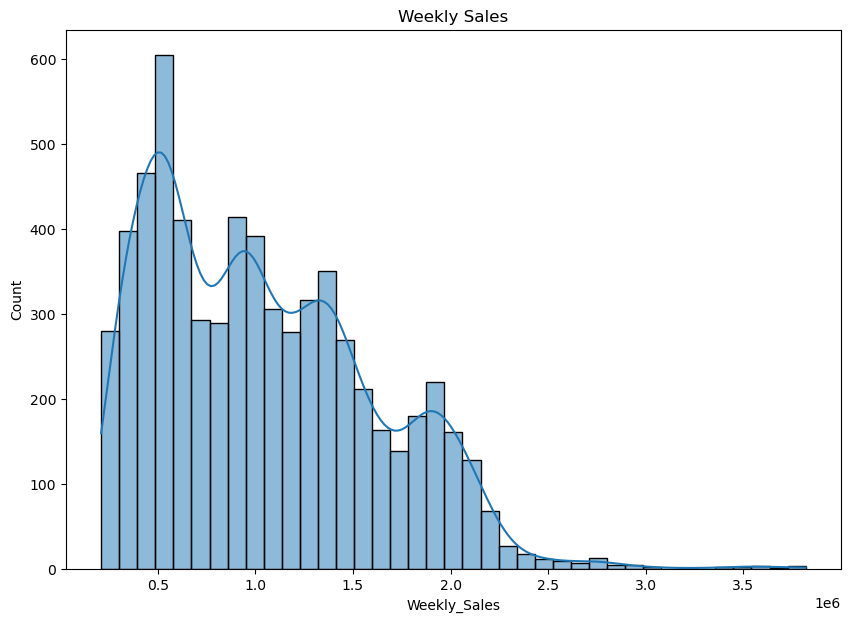

In [33]:
plt.figure(figsize=(10,7))
sns.histplot(df['Weekly_Sales'],kde=True)
plt.title("Weekly Sales")

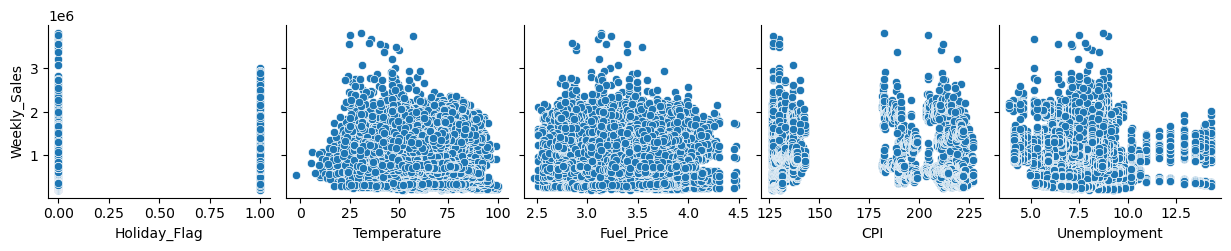

In [34]:
sns.pairplot(df, x_vars=['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], 
             y_vars=['Weekly_Sales'], kind='scatter')

**so to find correlation we have to drop date column because data by default is in string format so i you dont drop it you will find a valueError and date column is not correlated with sales of the company so we drop it.**


In [35]:
 df = df.drop('Date', axis = 1)



In [36]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,718125.53,0,56.47,3.969,192.330854,8.667


Text(0.5, 1.0, 'correlation matrix')

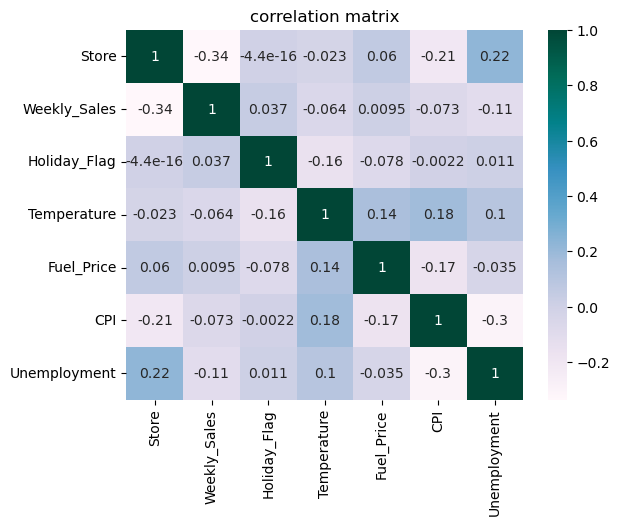

In [37]:
##Now let's find correlation
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='PuBuGn')
plt.title('correlation matrix')


* **so this headmap graph shows correlation between columns means each column is correlated with other and itself the value 1 in the heatmap shows it is correlated to itself or the column is more correlated to other column if the value is clogest to 1.**

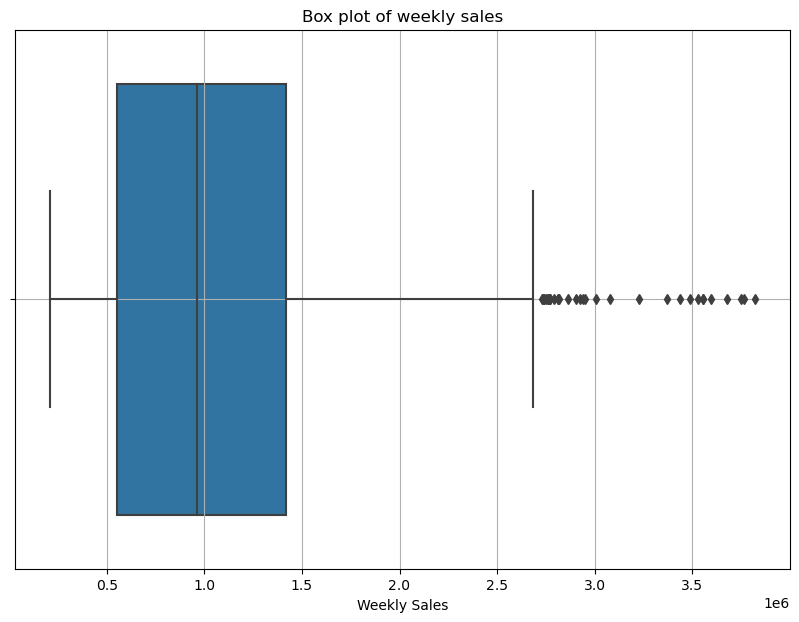

In [38]:
# box plot
plt.figure(figsize=(10, 7))
sns.boxplot(df['Weekly_Sales'])
plt.xlabel("Weekly Sales")
plt.title("Box plot of weekly sales")
plt.grid(True)

#Let's find outlier in the data using IQR technique

In [39]:
Q1 = df["Weekly_Sales"].quantile(0.25)
Q3 = df["Weekly_Sales"].quantile(0.75)

#fing IQR
IQR = Q3-Q1

lower_bound = Q1-IQR*1.5
upper_bound = Q3+IQR*1.5

so Q1 contains where 25 percentile of data comes 

In [40]:
Q1

553350.105

and Q3 cointians 75 percentile of data

In [41]:
Q3

1420158.66

In [42]:
IQR

866808.5549999999

In [43]:
#lower_bound state that below that value all are the outliers
lower_bound

-746862.7275

In [44]:
#upper_bound state that above that value all are the outliers
upper_bound

2720371.4924999997

In [45]:
data_without_outliers = df[(df["Weekly_Sales"]>=lower_bound ) & (df["Weekly_Sales"]<=upper_bound)]

In [46]:
#now this data is not contains any outlier
data_without_outliers

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,718125.53,0,56.47,3.969,192.330854,8.667


In [47]:
#Let split the data into train test split
#fist take the data into X, and target variabel in y so X are features like other column 
#than Weekly_Sales and target column is Weekly sales which is in y.
X = data_without_outliers.drop('Weekly_Sales',axis=1)
y = data_without_outliers['Weekly_Sales']

In [48]:
#Now use sklearn train_test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101)

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
selector = SelectKBest(score_func=f_regression, k=5)

models = [('Linear Regression', LinearRegression()),
          ('Decision Tree', DecisionTreeRegressor()),
          ('Random Forest', RandomForestRegressor())]
pipelines = []
score_list = []

for name, model in models:
    pipelines.append(Pipeline([('scaler', scaler),
                             ('selector', selector),
                             ('model', model)]))
    
for pipeline in pipelines:
    
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    score_list.append(scores)
    print(f"{pipeline.named_steps['model'].__class__.__name__}:")
    print(f"Mean R^2 Score: {scores.mean():.4f}, Std Dev: {scores.std():.4f}\n")
    




LinearRegression:
Mean R^2 Score: 0.1299, Std Dev: 0.0149

DecisionTreeRegressor:
Mean R^2 Score: 0.9173, Std Dev: 0.0063

RandomForestRegressor:
Mean R^2 Score: 0.9456, Std Dev: 0.0076



# conclusion
* Linear Regression shows r^2 is .13 means the r^2 is low and std dev is high so it shows that Linear regression model perform less on each fold of data.
* Decision Tree perform better is shows r^2 is .91 and std dec is low so that if r^2 is high and std dev is low than is model performs best on the each fold of data.
* random forest is best model to perform because r^2 is high .94 and std is low so that the random forest is best for this data when we fit the model using function cross_val_score. **

* we try cross_val_score function and it gives the best model 
* Let's try to fit the best model on hole data 


In [50]:
best_model = pipelines[np.argmax([scores.mean() for scores in score_list])]
best_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('selector',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x00000000236DA5E0>)),
                ('model', RandomForestRegressor())])

In [51]:
#Let's predict 
y_pred = best_model.predict(X_test)
y_pred

array([ 608440.6361, 1328614.4204, 1383518.1869, ..., 1013040.1174,
       2089512.4048,  428912.381 ])

In [52]:
#lets calculate the r^2 score and mae and mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

r2 = r2_score(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
mse = np.sqrt(mean_squared_error(y_pred, y_test))
print("r^2 score :", r2)
print(f'MAE:',mae)
print(f'MSE:',mse)

r^2 score : 0.9369342067095936
MAE: 72583.83457431695
MSE: 135630.67191583652


* using the best model random forest the r^2 score is high so that random forest is best model.
* MAE,MSE means the difference between the predictive value and the actual value so it is low so that our model performs Good.